In [11]:
# Auxiliary Libraries
import numpy as np
import itertools

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dataset
from sklearn.datasets import load_iris

# Import my own methods
from distances import distance, sort_distances
from plotting import scatter, heatmap, surface
from clusters import grid, boxes, box_clusters, neighbors
from auxiliary import normalize, read, one_hot_encoding
from main import main


In [3]:
# Load the Iris dataset
iris = load_iris()

# Access attributes
data = iris.data  # The feature data (sepal length, sepal width, petal length, petal width)
target = iris.target  # The target labels (0 for Setosa, 1 for Versicolor, and 2 for Virginica)
target_names = iris.target_names  # The names of the target classes

# See the description of the dataset
description = iris.DESCR
print(description)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [63]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# Access attributes
data = iris.data  # The feature data (sepal length, sepal width, petal length, petal width)
target = iris.target


targets = [iris.target_names[i] for i in iris.target]
data_ =  np.column_stack((data, targets))
data_

array([['5.1', '3.5', '1.4', '0.2', 'setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'setosa'],
       ['5.4', '3.9', '1.7', '0.4', 'setosa'],
       ['4.6', '3.4', '1.4', '0.3', 'setosa'],
       ['5.0', '3.4', '1.5', '0.2', 'setosa'],
       ['4.4', '2.9', '1.4', '0.2', 'setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'setosa'],
       ['5.4', '3.7', '1.5', '0.2', 'setosa'],
       ['4.8', '3.4', '1.6', '0.2', 'setosa'],
       ['4.8', '3.0', '1.4', '0.1', 'setosa'],
       ['4.3', '3.0', '1.1', '0.1', 'setosa'],
       ['5.8', '4.0', '1.2', '0.2', 'setosa'],
       ['5.7', '4.4', '1.5', '0.4', 'setosa'],
       ['5.4', '3.9', '1.3', '0.4', 'setosa'],
       ['5.1', '3.5', '1.4', '0.3', 'setosa'],
       ['5.7', '3.8', '1.7', '0.3', 'setosa'],
       ['5.1', '3.8', '1.5', '0.3', 'setosa'],
       ['5.4', '3.4', '1.7', '0.2', 'setosa'],
       ['5.1'

In [5]:
data_categorical = one_hot_encoding(data_, [4])
data_categorical

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [9]:

categorical = [4]
# If data contains categorical variables, use one-hot-encoding.
if categorical != None:
    categorical_data = one_hot_encoding(data_, categorical)


    norm_data = normalize(categorical_data)
    
else: norm_data = normalize(data)

norm_data

array([[0.22222222, 0.625     , 0.06779661, ..., 1.        , 0.        ,
        0.        ],
       [0.16666667, 0.41666667, 0.06779661, ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.5       , 0.05084746, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.61111111, 0.41666667, 0.71186441, ..., 0.        , 0.        ,
        1.        ],
       [0.52777778, 0.58333333, 0.74576271, ..., 0.        , 0.        ,
        1.        ],
       [0.44444444, 0.41666667, 0.69491525, ..., 0.        , 0.        ,
        1.        ]])

In [95]:
plotting = False
metric = 'euclidean'
clusters = 3
categorical = None
# If data contains categorical variables, use one-hot-encoding. Normalize data
if categorical != None:
    categorical_data = one_hot_encoding(data, categorical)
    norm_data = normalize(categorical_data)
else: norm_data = normalize(data)

# Plot the normalized data in the hypercube [0,1]x[0,1]x[0,1] for all sets of dimensions.
if plotting: scatter(norm_data)

# Calculate the distance matrix from all points to all points and plot the heatmap.
D = distance(norm_data, metric = metric)
if plotting: 
    heatmap(D, "Heatmap of "+metric+" Distance Matrix (Points x Points)") 
    surface(D, "Surface plot of "+metric+" Distance Matrix (Points x Points)")

# Sort the distance matrix using the boxes cluster criteria and plot the heatmap and surface map.
D, _, _ = sort_distances(distance(norm_data, metric = metric), div=clusters)
if plotting: 
    heatmap(D, "Heatmap of sorted "+metric+" Distance Matrix (Points x Points)")
    surface(D, "Surface plot of sorted "+metric+" Distance Matrix (Points x Points)")

vertices = grid(norm_data.shape[1], 1/2)

# Calculate the distance matrix from all vertices to all points and plot the heatmap.
D = distance(norm_data, vertices, metric = metric)
# if plotting: 
#     heatmap(D, "Heatmap of "+metric+" Distance Matrix (Vertices x Points)") 
#     surface(D, "Surface plot of "+metric+" Distance Matrix (Vertices x Points)")

Clusters = []
Metrics = ['euclidean', 'manhattan', 'cosine', 'lp']
Metrics = ['euclidean']
for met in Metrics:

    D = distance(norm_data, metric = met)

    b = boxes(D, div = clusters)
    
    M = box_clusters(b, D)
    Clusters.append(M)

    labels = neighbors(D, clusters, 0.19)
    print(labels)

    Clusters.append(labels)

labels

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

In [92]:
matrix = labels
# Class labels
class_labels = ["0", "1", "2"]

# Create an array to store the class for each point
point_classes = []

# Iterate through each column in the matrix
for column in matrix.T:
    # Find the class with the maximum value in the column
    class_index = np.argmax(column)
    # Get the corresponding class label
    class_label = class_labels[class_index]
    # Append the class label to the point_classes array
    point_classes.append(class_label)

# Convert the point_classes list to a NumPy array
point_classes_array = np.array(point_classes)

# Print the result
print(point_classes_array)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '0' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '0' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2']


In [82]:
values = point_classes_array
# Create a dictionary where the keys are unique elements and the values are lists of indices
clusters = {int(value): np.where(values == value)[0].tolist() for value in np.unique(values)}

target_clusters =  {int(value): np.where(target == value)[0].tolist() for value in np.unique(target)}

# Print the result
print(clusters)
print(target_clusters)

{0: [10, 11, 12, 13, 14, 50, 51, 52, 54, 56, 58, 63, 65, 68, 70, 72, 73, 74, 75, 76, 77, 78, 83, 85, 86, 87, 91, 101, 102, 103, 104, 108, 110, 111, 112, 113, 115, 116, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 132, 133, 134, 137, 138, 139, 141, 142, 143, 145, 146, 147, 149], 1: [5, 6, 7, 8, 9, 23, 41, 53, 55, 57, 59, 60, 61, 62, 64, 66, 67, 69, 71, 79, 80, 81, 82, 84, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 105, 106, 107, 109, 114, 117, 118, 122, 130, 131, 135, 136, 140, 144, 148], 2: [0, 1, 2, 3, 4, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]}
{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 1: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

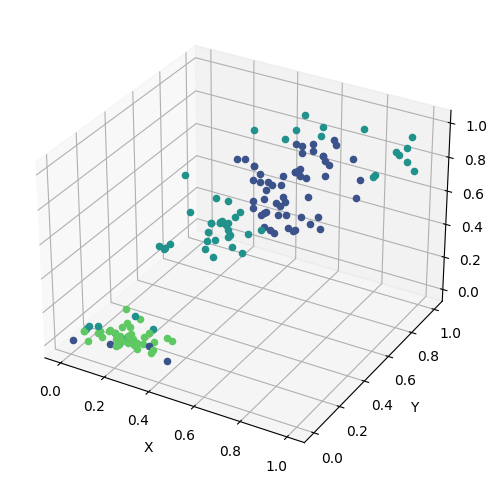

In [87]:
import warnings
def plot_data_by_clusters_3d(data, clusters, palette="viridis", x_label='X', y_label='Y', z_label='Z',
                              figsize=(10, 6), axis = [0,1,2], return_figure=False):
    """
    Create a 3D scatter plot of data points with different clusters using Matplotlib.

    Parameters:
        data (numpy.ndarray): Data points with three columns (x, y, z).
        clusters (dict): A dictionary where keys are cluster labels and values are lists of indices in each cluster.
        palette (str): Color palette for clusters (e.g., "viridis", "coolwarm", "Blues").
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        z_label (str): Label for the z-axis.
        figsize (tuple): Figure size (width, height) for the plot.
        return_figure (bool): Whether to return the Matplotlib figure.

    Returns:
        matplotlib.figure.Figure (optional): The Matplotlib figure if return_figure is True, else None.
    """
    # Suppress warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=UserWarning)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    colors = sns.color_palette(palette, len(clusters))

    for id_color, cluster_indices in enumerate(clusters.values()):
        for j in cluster_indices:
            ax.scatter(data[j, axis[0]], data[j, axis[1]], data[j, axis[2]], c=colors[id_color], marker='o')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    if return_figure:
        return fig

    plt.show()

    # Restore warnings to their default behavior
    warnings.resetwarnings()

plot_data_by_clusters_3d(norm_data, clusters, axis = [0,2,3])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

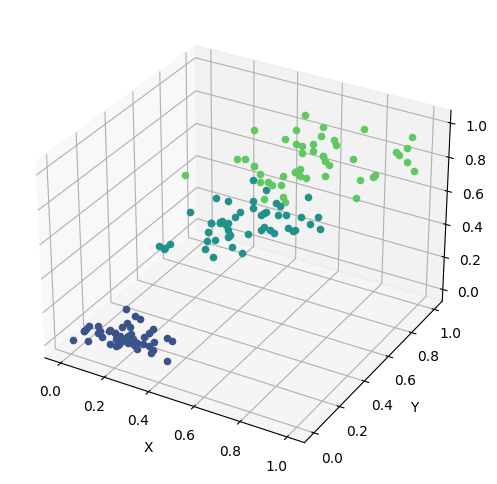

In [86]:
plot_data_by_clusters_3d(norm_data, target_clusters, axis = [0,2,3])

In [85]:
D = distance(norm_data, metric = 'euclidean')
b = boxes(D, div = 4)
M = box_clusters(b, D)
len(M)

3